## Prediction of survival on Titanic

We are going to do analysis of what sorts of people were likely to survive. So by applying the tools of machine learning to predict which passengers survived the tragedy.
In this project, we are going to implement Random Forests using scikit-learn.
For the Titanic data download the "train" and "test" datasets from https://www.kaggle.com/c/titanic/data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns  

%matplotlib inline

In [2]:
# loading data 

from pandas import Series, DataFrame
titanic_df = pd.read_csv("train_Titanic.csv", dtype={'Age':np.float64})
test_df = pd.read_csv("test_Titanic.csv", dtype={'Age':np.float64})

In [3]:
titanic_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_df.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Now Finding the missing values.We are going to find the "Survived" value for each Passenger so just we need only useful features to predict efficiently.PassengerId column is no use so let's drop it. 

In [10]:
titanic_df.drop(['PassengerId'], axis=1, inplace=True)

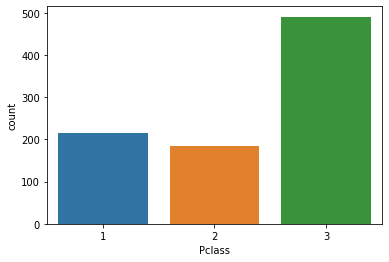

In [11]:
# Pclass is the class in which the passengers were travelling which can take values 1, 2 and 3.
sns.countplot('Pclass', data=titanic_df)

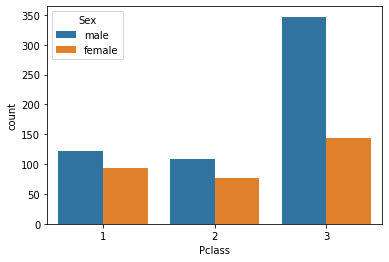

In [12]:
#Finding how many of them were male/female
sns.countplot('Pclass', hue='Sex', data=titanic_df, order=[1,2,3])

So from the above graph we can see that many males are in 3rd class. Somewhat equal proportion in the other two clases.
Let's see how many of them survived

C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


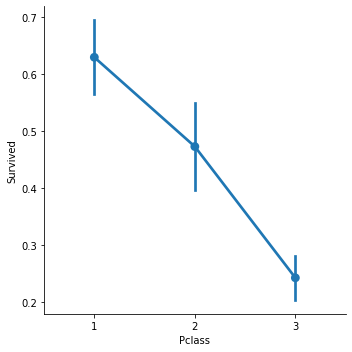

In [13]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3], size=5)

The survival rate of 3rd class is much lower.

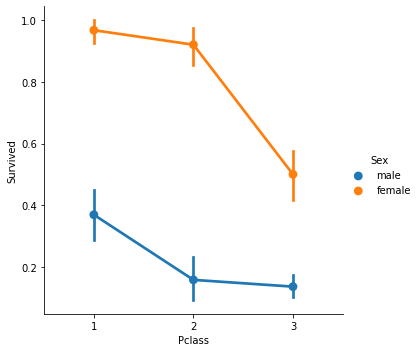

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic_df, order=[1,2,3])

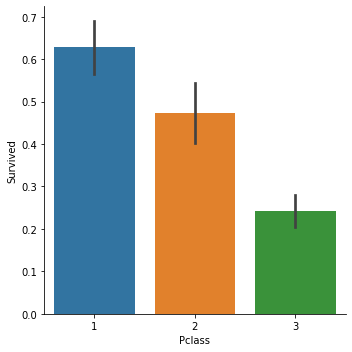

In [15]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, kind='bar', order=[1,2,3])

In [16]:
# Let's move on to the next feature 'Name' 
titanic_df.drop(['Name'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


"Survived" == 0 indicates "DID NOT Survive"; 1 == "Survived"
Now, we've looked at features uptil Pclass; Next is "Sex"

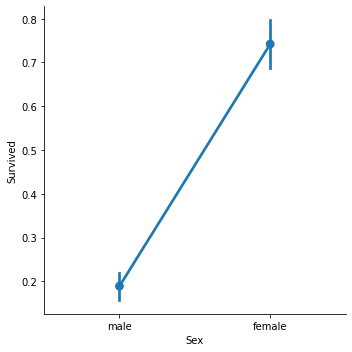

In [17]:
# Let's look at Sex and Age simultaneously (kind of) to gain better insight.
sns.factorplot('Sex', 'Survived', data=titanic_df)

C:\Users\pooja\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\pooja\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


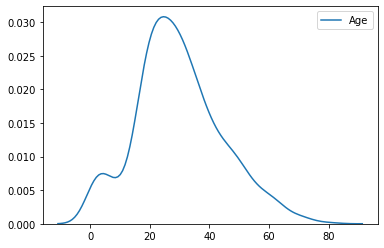

In [18]:
sns.kdeplot(titanic_df['Age'])

There are many children, let's study them separately.
Convert "Sex" into "Person" column which can take values: "Male", "Female", "Child"

In [19]:
def what_person(passenger):
    age,sex = passenger
    if age <= 16:
        return 'Child'
    else: 
        return sex

In [20]:
titanic_df["Person"] = titanic_df[['Age','Sex']].apply(what_person, axis=1)

# axis=1 specifies that the operation is to be done on columns.
# Drop "Sex" now, since it is redundant

titanic_df.drop(['Sex'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,female
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,1,1,35.0,1,0,113803,53.1000,C123,S,female
4,0,3,35.0,0,0,373450,8.0500,NaN,S,male


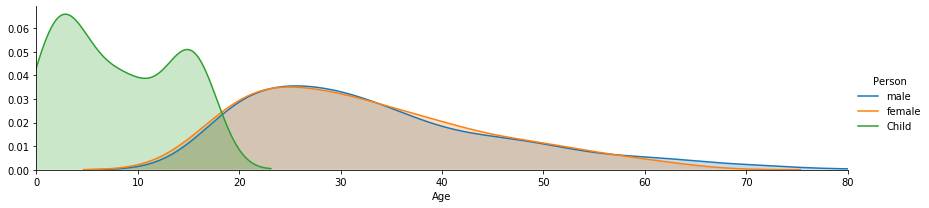

In [21]:
fig = sns.FacetGrid(data=titanic_df, hue="Person", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()

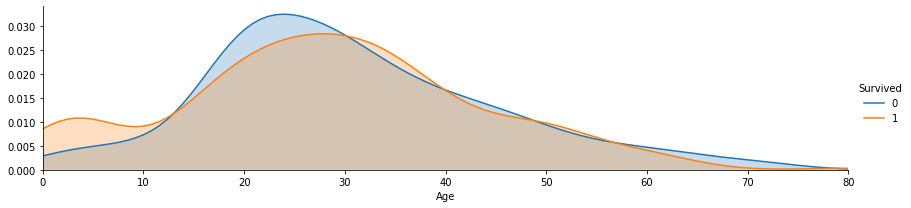

In [22]:
fig = sns.FacetGrid(data=titanic_df, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()

In [23]:
titanic_df.info()
print("Missing Age values:", titanic_df['Age'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Person      891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
Missing Age values: 177


In [24]:
# fill the missing Age values now by generating random numbers between mean-std & mean+std
mean = titanic_df['Age'].mean()
std = titanic_df['Age'].std()

r = np.random.randint(mean-std, mean+std)
titanic_df["Age"].fillna(r, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Person      891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


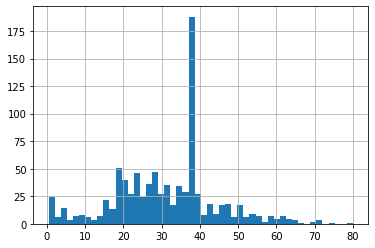

In [25]:
titanic_df['Age'].hist(bins=50)

looking at next two features like SibSp is any siblings/spouses on board? Parch is any parent/child on board? We could reduce these to a single feature: "WithFamily"?

In [26]:
titanic_df['WithFamily'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.drop(['SibSp','Parch'], axis=1, inplace=True)
titanic_df.head(15)

,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,Person,WithFamily
0,0,3,22.0,A/5 21171,7.2500,NaN,S,male,1
1,1,1,38.0,PC 17599,71.2833,C85,C,female,1
2,1,3,26.0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,1,1,35.0,113803,53.1000,C123,S,female,1
4,0,3,35.0,373450,8.0500,NaN,S,male,0
5,0,3,38.0,330877,8.4583,NaN,Q,male,0
6,0,1,54.0,17463,51.8625,E46,S,male,0
7,0,3,2.0,349909,21.0750,NaN,S,Child,4
8,1,3,27.0,347742,11.1333,NaN,S,female,2
9,1,2,14.0,237736,30.0708,NaN,C,Child,1


In [27]:
# If "WithFamily" == 0, He was alone. Hence, value should be 0.
titanic_df['WithFamily'].loc[titanic_df['WithFamily'] > 0] = 1
titanic_df.head(15)

C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,Person,WithFamily
0,0,3,22.0,A/5 21171,7.2500,NaN,S,male,1
1,1,1,38.0,PC 17599,71.2833,C85,C,female,1
2,1,3,26.0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,1,1,35.0,113803,53.1000,C123,S,female,1
4,0,3,35.0,373450,8.0500,NaN,S,male,0
5,0,3,38.0,330877,8.4583,NaN,Q,male,0
6,0,1,54.0,17463,51.8625,E46,S,male,0
7,0,3,2.0,349909,21.0750,NaN,S,Child,1
8,1,3,27.0,347742,11.1333,NaN,S,female,1
9,1,2,14.0,237736,30.0708,NaN,C,Child,1


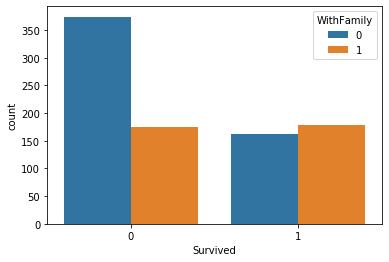

In [28]:
sns.countplot('Survived', data=titanic_df, hue='WithFamily')

In [29]:
# Next feature is Ticket, which we don't need.So let's remove it
titanic_df.drop(['Ticket'], axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
# Let's look at Fare
# Missing values only in test_df

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# Convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)


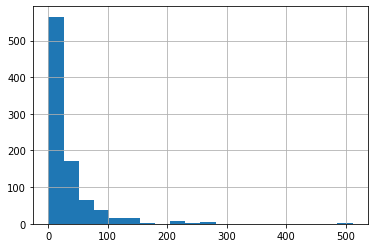

In [31]:
titanic_df['Fare'].hist(bins=20)

In [32]:
# Let's see if they vary with Survival chances
fare_notSurvived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived = titanic_df['Fare'][titanic_df["Survived"] == 1]
print("Died: ", fare_notSurvived.mean())
print("Survived: ", fare_survived.mean())

Died:  21.690346083788707
Survived:  47.99122807017544


In [33]:
titanic_df.head()

,Survived,Pclass,Age,Fare,Cabin,Embarked,Person,WithFamily
0,0,3,22.0,7,NaN,S,male,1
1,1,1,38.0,71,C85,C,female,1
2,1,3,26.0,7,NaN,S,female,0
3,1,1,35.0,53,C123,S,female,1
4,0,3,35.0,8,NaN,S,male,0


Now, we've looked at "Survived" "Pclass" "Age" "Fare"
Created two new features/columns "Person" "WithFamily";
Let's look at Cabin now. Cabin is in the format: C85 where the first letter ('C', in this case) is the deck
Deck seems to give out important info as compared to the room no. 
Let's extract all decks from Cabin and drop null values.

In [34]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

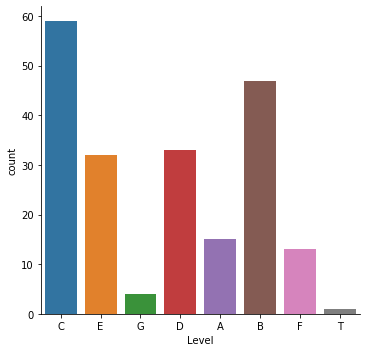

In [35]:
floor = []
for level in deck:
    floor.append(level[0])

# To visualise it, let's convert it into a DataFrame
df = DataFrame(floor, columns=['Level'])
sns.factorplot('Level', kind='count', data=df)

In [36]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int32
Cabin         204 non-null object
Embarked      889 non-null object
Person        891 non-null object
WithFamily    891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 52.3+ KB


we can see that the 'Cabin' column has a lot of missing values.
On top of that, there is just one value for deck 'T' which doesn't make any sense.
Filling 75% of the values on our own would affect prediction. Hence, it is better to drop this column

In [37]:
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Age,Fare,Embarked,Person,WithFamily
0,0,3,22.0,7,S,male,1
1,1,1,38.0,71,C,female,1
2,1,3,26.0,7,S,female,0
3,1,1,35.0,53,S,female,1
4,0,3,35.0,8,S,male,0


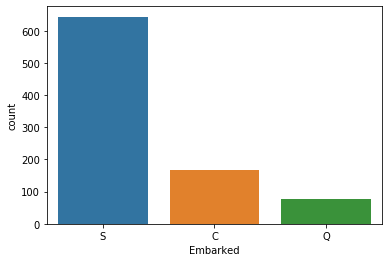

In [38]:
# Let's look at our last feature: Embarked
sns.countplot('Embarked', data=titanic_df)

In [39]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int32
Embarked      889 non-null object
Person        891 non-null object
WithFamily    891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.3+ KB


In [40]:
# Just two missing values! Let's fill it with "S" (the most frequent)
titanic_df['Embarked'].fillna("S", inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int32
Embarked      891 non-null object
Person        891 non-null object
WithFamily    891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.3+ KB


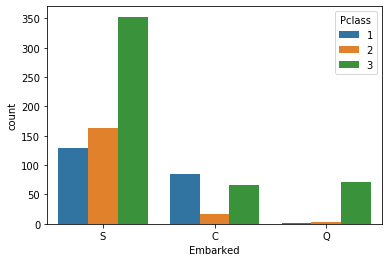

In [41]:
sns.countplot('Embarked', hue='Pclass', data=titanic_df)

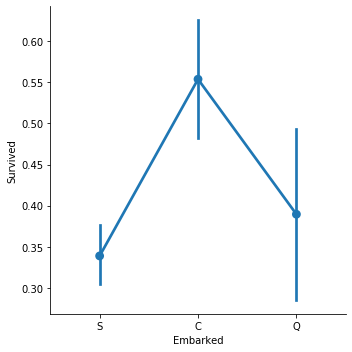

In [42]:
# We can see that almost all passengers from Queenstown (Q) were travelling in 3rd class.
# Let's look at who survived
sns.factorplot('Embarked', 'Survived', data=titanic_df)

In [43]:
# Passengers that embarked at "S" had a less rate of survival;
embark = titanic_df[['Embarked', 'Survived']].groupby(['Embarked']).mean()
embark

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


Until now we've looked at all the features now it's time for machine learning by using Random Forests

In [44]:
# Before that, let's look at our train and test datasets
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int32
Embarked      891 non-null object
Person        891 non-null object
WithFamily    891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.3+ KB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null int32
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 34.4+ KB


In [46]:
# Let's make our test_df compatible with titanic_df; since we're going to train our classifier on titanic_df
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Now, let's create Person for test_df:
test_df["Person"] = test_df[['Age','Sex']].apply(what_person, axis=1)
test_df.drop(['Sex'], inplace=True, axis=1)

# Now, let's create WithFamily for test_df:
test_df['WithFamily'] = test_df['SibSp'] + test_df['Parch']
test_df.drop(['SibSp','Parch'], axis=1, inplace=True)
test_df['WithFamily'].loc[test_df['WithFamily'] > 0] = 1

In [47]:
test_df.info()
print("Missing: ", test_df['Age'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            332 non-null float64
Fare           418 non-null int32
Embarked       418 non-null object
Person         418 non-null object
WithFamily     418 non-null int64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 21.3+ KB
Missing:  86


In [48]:
# Let's fill in the missing Age values
mean = test_df['Age'].mean()
std = test_df['Age'].std()

r = np.random.randint(mean-std, mean+std)
test_df['Age'].fillna(r, inplace=True)

# Change its dataype to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null int32
Fare           418 non-null int32
Embarked       418 non-null object
Person         418 non-null object
WithFamily     418 non-null int64
dtypes: int32(2), int64(3), object(2)
memory usage: 19.7+ KB


In [49]:
# There is one last issue remaining before we can feed this dataset to Random Forest
# Embarked & Person need to converted to Numeric variables
# We'll use dummy variables: 
# It is a variable that takes 0/1 indicating absence/presence of a particular category

titanic_embarked = pd.get_dummies(titanic_df['Embarked'])
titanic_embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [50]:
titanic_df = titanic_df.join(titanic_embarked)
titanic_df.head()

,Survived,Pclass,Age,Fare,Embarked,Person,WithFamily,C,Q,S
0,0,3,22,7,S,male,1,0,0,1
1,1,1,38,71,C,female,1,1,0,0
2,1,3,26,7,S,female,0,0,0,1
3,1,1,35,53,S,female,1,0,0,1
4,0,3,35,8,S,male,0,0,0,1


In [51]:
# Person 
titanic_person = pd.get_dummies(titanic_df['Person'])
titanic_person.head()

,Child,female,male
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [52]:
titanic_df = titanic_df.join(titanic_person)

# Let's remove Person/Embarked now
titanic_df.drop(['Person','Embarked'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Age,Fare,WithFamily,C,Q,S,Child,female,male
0,0,3,22,7,1,0,0,1,0,0,1
1,1,1,38,71,1,1,0,0,0,1,0
2,1,3,26,7,0,0,0,1,0,1,0
3,1,1,35,53,1,0,0,1,0,1,0
4,0,3,35,8,0,0,0,1,0,0,1


In [53]:
test_df.head()

,PassengerId,Pclass,Age,Fare,Embarked,Person,WithFamily
0,892,3,34,7,Q,male,0
1,893,3,47,7,S,female,1
2,894,2,62,9,Q,male,0
3,895,3,27,8,S,male,0
4,896,3,22,12,S,female,1


In [54]:
# Let's repeat the same procedure for test_df
test_embarked = pd.get_dummies(test_df['Embarked'])
test_df = test_df.join(test_embarked)

test_person = pd.get_dummies(test_df['Person'])
test_df = test_df.join(test_person)

test_df.drop(['Person','Embarked'], axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Age,Fare,WithFamily,C,Q,S,Child,female,male
0,892,3,34,7,0,0,1,0,0,0,1
1,893,3,47,7,1,0,0,1,0,1,0
2,894,2,62,9,0,0,1,0,0,0,1
3,895,3,27,8,0,0,0,1,0,0,1
4,896,3,22,12,1,0,0,1,0,1,0


In [55]:
# Now is the time set up our training and test datasets:
x_train = titanic_df.drop(['Survived'], axis=1)

y_train = titanic_df['Survived']

x_test = test_df.drop(['PassengerId'], axis=1)

x_train.head()

,Pclass,Age,Fare,WithFamily,C,Q,S,Child,female,male
0,3,22,7,1,0,0,1,0,0,1
1,1,38,71,1,1,0,0,0,1,0
2,3,26,7,0,0,0,1,0,1,0
3,1,35,53,1,0,0,1,0,1,0
4,3,35,8,0,0,0,1,0,0,1


In [56]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=20)

forest.fit(x_train, y_train)

prediction = forest.predict(x_test)

prediction

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
forest.score(x_train, y_train)

0.9528619528619529

This accuracy of 95% can be misleading. Remember, we trained (fit) our model on x_train and y_train only Then, we are scoring it on the same dataset which is not a good practice We should always split our dataset; train on one part, test on the other part.


In [58]:
# Gives the importance of each feature:
forest.feature_importances_

array([0.10616198, 0.27440258, 0.24575202, 0.02963861, 0.01750997,
       0.00978227, 0.01548928, 0.01057756, 0.12938197, 0.16130376])

In [59]:
# Let's finally submit to Kaggle!!!!
Result = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':prediction})
Result.head(20)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0
